In [2]:
from pipeline import Pipeline, Process, Postprocess, Preprocess
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import cv2
import os

In [2]:
class MyPreProcess(Preprocess):
    process_desc = "Exemple de pre-process -> ne fait rien"
    def run(self, images):
        pass


class MyProcess(Process):
    process_desc = "Exemple de process -> ne fait rien"
    def run(self, images):
        pass
    
    
class MyPostProcess(Postprocess):
    process_desc = "Exemple de post-process -> ne fait rien"
    def run(self, images):
        pass

In [3]:
pipeline = Pipeline()
process_array = np.array([MyPreProcess()
                          ,MyProcess()
                          ,MyPostProcess()
                          ,MyPreProcess(verbose=0)])
pipeline.add_processes(process_array)


Preprocess :  Exemple de pre-process -> ne fait rien
Process :  Exemple de process -> ne fait rien
Postprocess :  Exemple de post-process -> ne fait rien
Exemple de pre-process -> ne fait rien a été ajouté.
Exemple de process -> ne fait rien a été ajouté.
Exemple de post-process -> ne fait rien a été ajouté.
Exemple de pre-process -> ne fait rien a été ajouté.


In [4]:
pipeline.print_process()

Exemple de pre-process -> ne fait rien
Exemple de pre-process -> ne fait rien
Exemple de process -> ne fait rien
Exemple de post-process -> ne fait rien


In [3]:
data = pd.read_csv('/home/sid2018-6/Documents/proget_interpromo/Interpromo2020/Interpromo2020/All Data/SEATGURU_INFO_AIRCRAFT.csv',';')

In [4]:
data.head()

,Data_Source,Airline_name,Aircraft_Type,Category,Flight_Type,Count,Total_seat,Seat_Class,Seat_Type,Seat_Position,...,Width,Bedlength_maximum,Bedlength_minimum,Music,VideoType,Power_available,Power_kind,Usb_available,Usb_kind,Rating
0,SeatGuru,aegean-airlines,Airbus A319-100,ECONOMY,short haul,138,138,Economy,STANDARD,BULKHEAD,...,18.0,NaN,NaN,NONE,NONE,NONE,NaN,NONE,NaN,2
1,SeatGuru,aegean-airlines,Airbus A319-100,ECONOMY,short haul,138,138,Economy,STANDARD,NORMAL,...,18.0,NaN,NaN,NONE,NONE,NONE,NaN,NONE,NaN,2
2,SeatGuru,aegean-airlines,Airbus A319-100,ECONOMY,short haul,138,138,Economy,STANDARD,EXIT_ROW,...,18.0,NaN,NaN,NONE,NONE,NONE,NaN,NONE,NaN,5
3,SeatGuru,aegean-airlines,Airbus A319-100,ECONOMY,short haul,138,138,Economy,STANDARD,NORMAL,...,18.0,NaN,NaN,NONE,NONE,NONE,NaN,NONE,NaN,3
4,SeatGuru,aegean-airlines,Airbus A319-100,ECONOMY,short haul,138,138,Economy,STANDARD,NORMAL,...,18.0,NaN,NaN,NONE,NONE,NONE,NaN,NONE,NaN,1


In [5]:
print(data.columns)
print(data.shape)

Index(['Data_Source', 'Airline_name', 'Aircraft_Type', 'Category',
       'Flight_Type', 'Count', 'Total_seat', 'Seat_Class', 'Seat_Type',
       'Seat_Position', 'Recline', 'Premium', 'Pitch_minimum', 'Pitch_maximum',
       'Width', 'Bedlength_maximum', 'Bedlength_minimum', 'Music', 'VideoType',
       'Power_available', 'Power_kind', 'Usb_available', 'Usb_kind', 'Rating'],
      dtype='object')
(10330, 24)


In [6]:
dataetu = data[7070:8000]
dataetu

,Data_Source,Airline_name,Aircraft_Type,Category,Flight_Type,Count,Total_seat,Seat_Class,Seat_Type,Seat_Position,...,Width,Bedlength_maximum,Bedlength_minimum,Music,VideoType,Power_available,Power_kind,Usb_available,Usb_kind,Rating
7070,SeatGuru,peach,Airbus A320-200,ECONOMY,short haul,180,180,Economy,STANDARD,BULKHEAD,...,17,NaN,NaN,NONE,NONE,NONE,NaN,NONE,NaN,4
7071,SeatGuru,peach,Airbus A320-200,ECONOMY,short haul,180,180,Economy,STANDARD,NORMAL,...,17,NaN,NaN,NONE,NONE,NONE,NaN,NONE,NaN,3
7072,SeatGuru,peach,Airbus A320-200,ECONOMY,short haul,180,180,Economy,STANDARD,NORMAL,...,17,NaN,NaN,NONE,NONE,NONE,NaN,NONE,NaN,2
7073,SeatGuru,peach,Airbus A320-200,ECONOMY,short haul,180,180,Economy,STANDARD,EXIT_ROW,...,17,NaN,NaN,NONE,NONE,NONE,NaN,NONE,NaN,4
7074,SeatGuru,peach,Airbus A320-200,ECONOMY,short haul,180,180,Economy,STANDARD,EXIT_ROW,...,17,NaN,NaN,NONE,NONE,NONE,NaN,NONE,NaN,5
7075,SeatGuru,peach,Airbus A320-200,ECONOMY,short haul,180,180,Economy,STANDARD,NORMAL,...,17,NaN,NaN,NONE,NONE,NONE,NaN,NONE,NaN,1
7076,SeatGuru,pegasus-airlines,Airbus A320-200,ECONOMY,short haul,180,180,Economy,STANDARD,BULKHEAD,...,17,NaN,NaN,NONE,OVERHEAD,NONE,NaN,NONE,NaN,2
7077,SeatGuru,pegasus-airlines,Airbus A320-200,ECONOMY,short haul,180,180,Economy,STANDARD,NORMAL,...,17,NaN,NaN,NONE,OVERHEAD,NONE,NaN,NONE,NaN,3
7078,SeatGuru,pegasus-airlines,Airbus A320-200,ECONOMY,short haul,180,180,Economy,STANDARD,NORMAL,...,17,NaN,NaN,NONE,OVERHEAD,NONE,NaN,NONE,NaN,2
7079,SeatGuru,pegasus-airlines,Airbus A320-200,ECONOMY,short haul,180,180,Economy,STANDARD,EXIT_ROW,...,17,NaN,NaN,NONE,OVERHEAD,NONE,NaN,NONE,NaN,4


In [7]:
list_type = dataetu['Aircraft_Type'].unique()
list_type

array(['Airbus A320-200', 'Airbus A320neo', 'Boeing 737-800', 'A350',
       'Airbus A320 B', 'Airbus A321', 'Airbus A330-300 V3',
       'Airbus A330 V3', 'Boeing 777-300ER', 'Q300', 'Q400',
       'A320-200 V1', 'Airlines Q400', 'Airways Airbus A330-200 B',
       'Airways Airbus A330-200 C', 'Airways Airbus A330-300',
       'Airways Airbus A380 B', 'Airways Boeing 717-200-125 new',
       'Airways Boeing 717-200 V3', 'Airways Boeing 737-800 V2',
       'Airways Boeing 747-400RR V2', 'Airways Boeing 747-400 4',
       'Airways Boeing 789', 'Airways Dash 8100', 'Airways Dash 8300',
       'Airways Q400', 'Airbus A319', 'Airbus A319 V2', 'Airbus A320 C',
       'Airbus A321 182pax', 'Airbus A321 196pax', 'Airbus A330-200 C',
       'Airbus A330-200 D', 'Airbus A330-200 F', 'Airbus A330-200 G',
       'Airbus A330-300', 'Airbus A330-300 B', 'Airbus A340-600',
       'Airbus A350', 'Airbus A350-900-Qsuites', 'Airbus A380',
       'Boeing 777-200LR', 'Boeing 777-200LR Qsuite',
       'Bo

In [8]:
list_comp = dataetu['Airline_name'].unique()
list_comp

array(['peach', 'pegasus-airlines', 'philippine-airlines', 'porter',
       'qantas', 'qatar-airways', 'regional-express',
       'rossiya---russian-airlines', 'royal-air-maroc', 'royal-brunei',
       'royal-jordanian', 'ryanair', 's7-airlines', 'sas', 'saudia'],
      dtype=object)

In [9]:
data_plane = dataetu.groupby('Airline_name')['Aircraft_Type'].unique().apply(list).reset_index(name='Aircraft_Type_comp')
data_plane

,Airline_name,Aircraft_Type_comp
0,peach,[Airbus A320-200]
1,pegasus-airlines,"[Airbus A320-200, Airbus A320neo, Boeing 737-800]"
2,philippine-airlines,"[A350, Airbus A320 B, Airbus A321, Airbus A330..."
3,porter,[Airlines Q400]
4,qantas,"[Airways Airbus A330-200 B, Airways Airbus A33..."
5,qatar-airways,"[Airbus A319, Airbus A319 V2, Airbus A320 B, A..."
6,regional-express,[SAAB 340B]
7,rossiya---russian-airlines,"[-800 D, A319-100 A, A319-100 B, A320-200 A, A..."
8,royal-air-maroc,"[ATR 72-600, Boeing 737-700, Boeing 737-800, B..."
9,royal-brunei,"[Airbus A320, Airbus A320 V2, Airlines Boeing ..."


In [10]:
l = []
for i in range(len(data_plane)):
    l.append(len(data_plane['Aircraft_Type_comp'][i]))
data_plane['nb_aircraft_type'] = l
data_plane

,Airline_name,Aircraft_Type_comp,nb_aircraft_type
0,peach,[Airbus A320-200],1
1,pegasus-airlines,"[Airbus A320-200, Airbus A320neo, Boeing 737-800]",3
2,philippine-airlines,"[A350, Airbus A320 B, Airbus A321, Airbus A330...",9
3,porter,[Airlines Q400],1
4,qantas,"[Airways Airbus A330-200 B, Airways Airbus A33...",13
5,qatar-airways,"[Airbus A319, Airbus A319 V2, Airbus A320 B, A...",25
6,regional-express,[SAAB 340B],1
7,rossiya---russian-airlines,"[-800 D, A319-100 A, A319-100 B, A320-200 A, A...",13
8,royal-air-maroc,"[ATR 72-600, Boeing 737-700, Boeing 737-800, B...",8
9,royal-brunei,"[Airbus A320, Airbus A320 V2, Airlines Boeing ...",3


In [11]:
sum(data_plane['nb_aircraft_type'])

112

In [6]:
# Test template matching

#img_rgb = cv2.imread('/home/sid2018-6/Documents/proget_interpromo/Interpromo2020/Interpromo2020/All Data/ANALYSE IMAGE/LAYOUT SEATGURU/Aegean_Airlines_Airbus_A320-200_plane2.svg.png')
#img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
#template = cv2.imread('/home/sid2018-6/Documents/proget_interpromo/Interpromo2020/Interpromo2020/All Data/ANALYSE IMAGE/v8L1gg1.jpeg',0)
#w, h = template.shape[::-1]

#res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
#threshold = 0.8
#loc = np.where( res >= threshold)
#for pt in zip(*loc[::-1]):
#    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

#cv2.imwrite('res.png',img_rgb)

True

In [77]:
list_img_SEATGURU = os.listdir('/home/sid2018-6/Documents/proget_interpromo/Interpromo2020/Interpromo2020/All Data/ANALYSE IMAGE/LAYOUT SEATGURU')
list_img_SEATGURU

['Iberia_Airbus_A321_plane498.svg.png',
 'Hong_Kong_Airlines_A330-300_V1_plane483.jpg',
 'Oman_Air_Boeing_737-700_new_plane686.jpg',
 'Air_France_ATR-72-600_plane94.svg.png',
 'Volotea_Airlines_V7_Boeing_717-200_plane328.svg.png',
 'Turkish_Airlines_Boeing_737-800_C_plane958.svg.png',
 'Azul_Airlines_Airbus_A320neo_plane242.jpg',
 'ANA_Boeing_767-300ER_A_plane295.jpg',
 'Qatar_Airways_Airbus_A321_plane746.svg.png',
 'American_Airlines_CRJ200_plane186.svg.png',
 'Aeroflot_Russian_Airlines_Airbus_A321_V2_plane10.jpg',
 'Qatar_Airways_Airbus_A350-900-Qsuites_plane733.svg.png',
 'Royal_Brunei_Airbus_A320_V2_plane773.jpg',
 'United_Airlines_Boeing_767-300_V3_plane968.svg.png',
 'Volotea_Airlines_V7_Airbus_A320-200_plane327.svg.png',
 'United_Airlines_Airbus_A320_V3_plane982.svg.png',
 'Air_Canada_Airbus_A320_B_plane34.svg.png',
 'Singapore_Air_Boeing_787-10_plane838.svg.png',
 'Volaris_Airlines_Airbus_A319_plane322.jpg',
 'Philippine_Airlines_Boeing_777-300ER_plane704.svg.png',
 'Icelandair

In [78]:
list_img_SEATGURU.index('Aeroflot_Russian_Airlines_Airbus_330_200_plane3.jpg')

846

# Test normé images: Pré process

In [79]:
data_path = "/home/sid2018-6/Documents/proget_interpromo/Interpromo2020/Interpromo2020/All Data/ANALYSE IMAGE/"

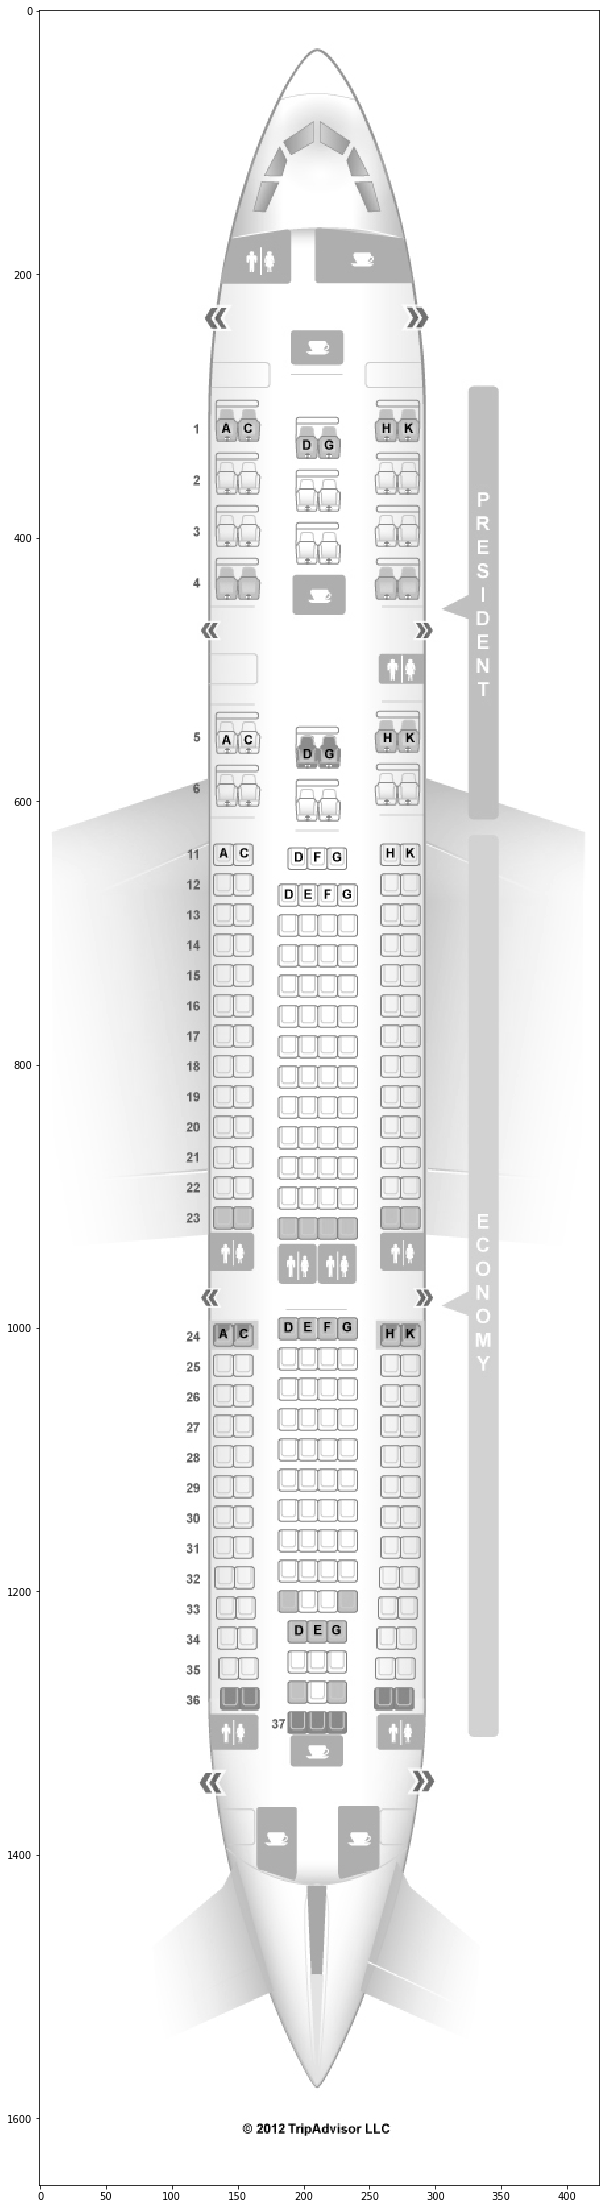

In [80]:
layout = "LAYOUT SEATGURU/"
data_path + layout + list_img_SEATGURU[846]

img = plt.imread(data_path + layout + list_img_SEATGURU[846])
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(20,40))
plt.imshow(imgray, cmap='gray')

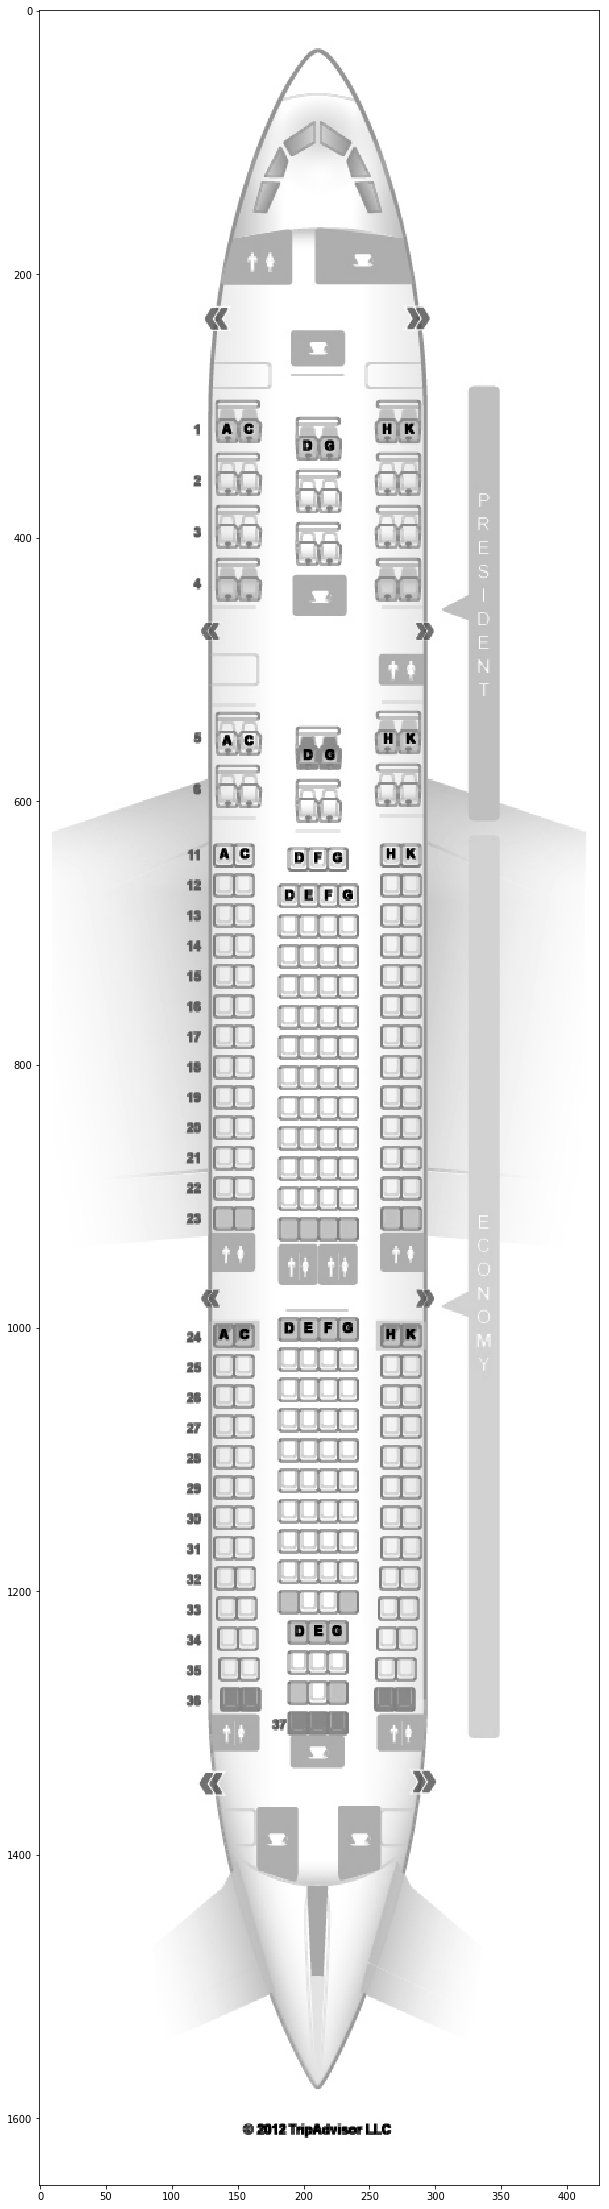

In [52]:
# Erosion:
kernel = np.ones((2,2),np.uint8)
erosion = cv2.erode(imgray,kernel,iterations = 1)
plt.figure(figsize=(20,40))
plt.imshow(erosion, cmap='gray')

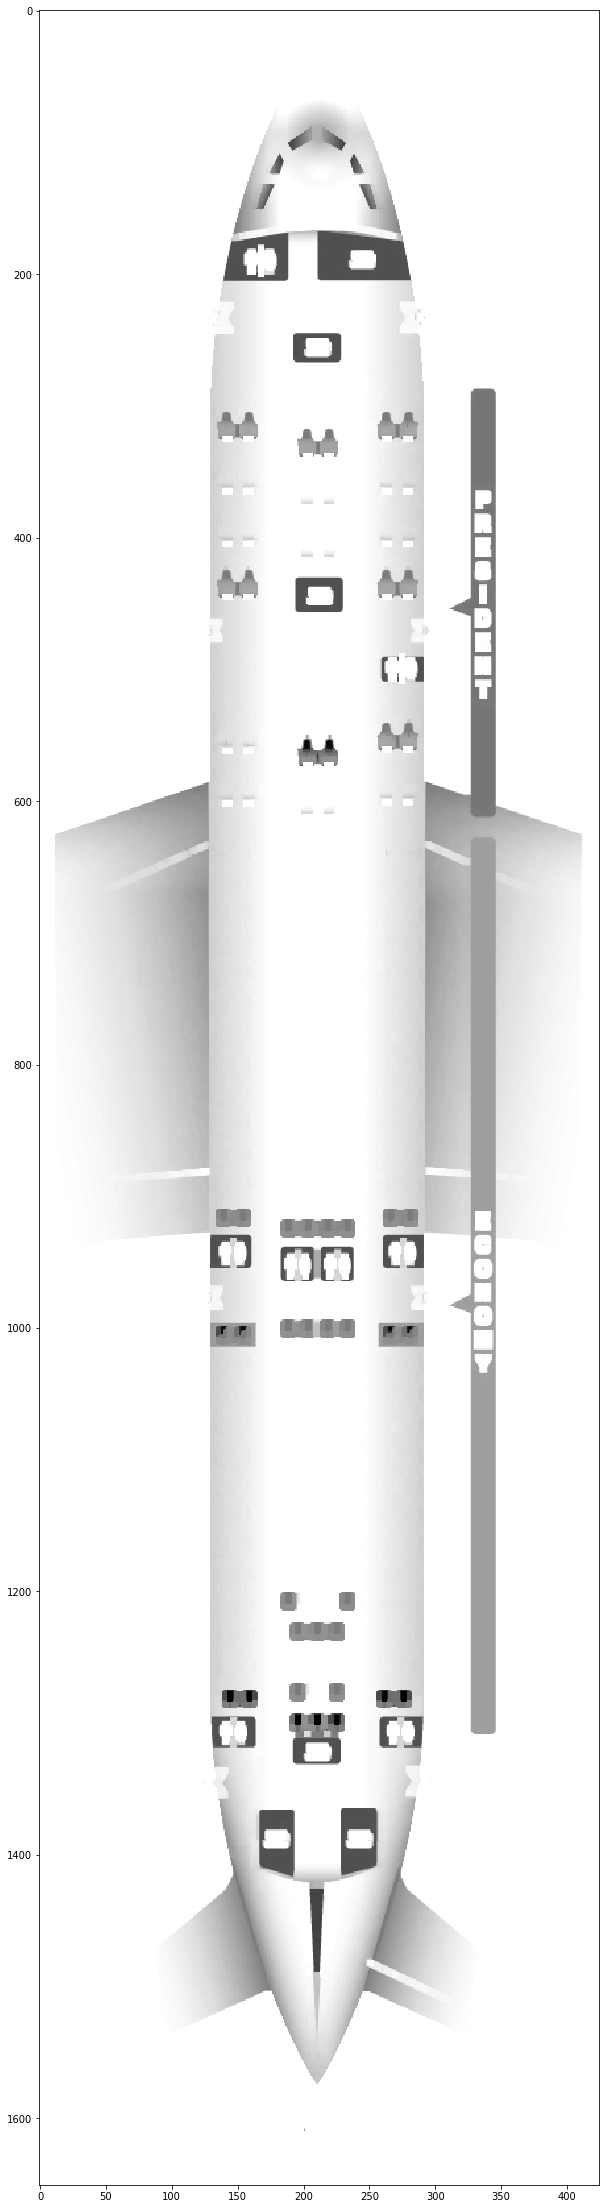

In [24]:
# Dilation:
kernel = np.ones((5,5),np.uint8)
dilation = cv2.dilate(imgray,kernel,iterations = 1)
plt.figure(figsize=(20,40))
plt.imshow(dilation, cmap='gray')

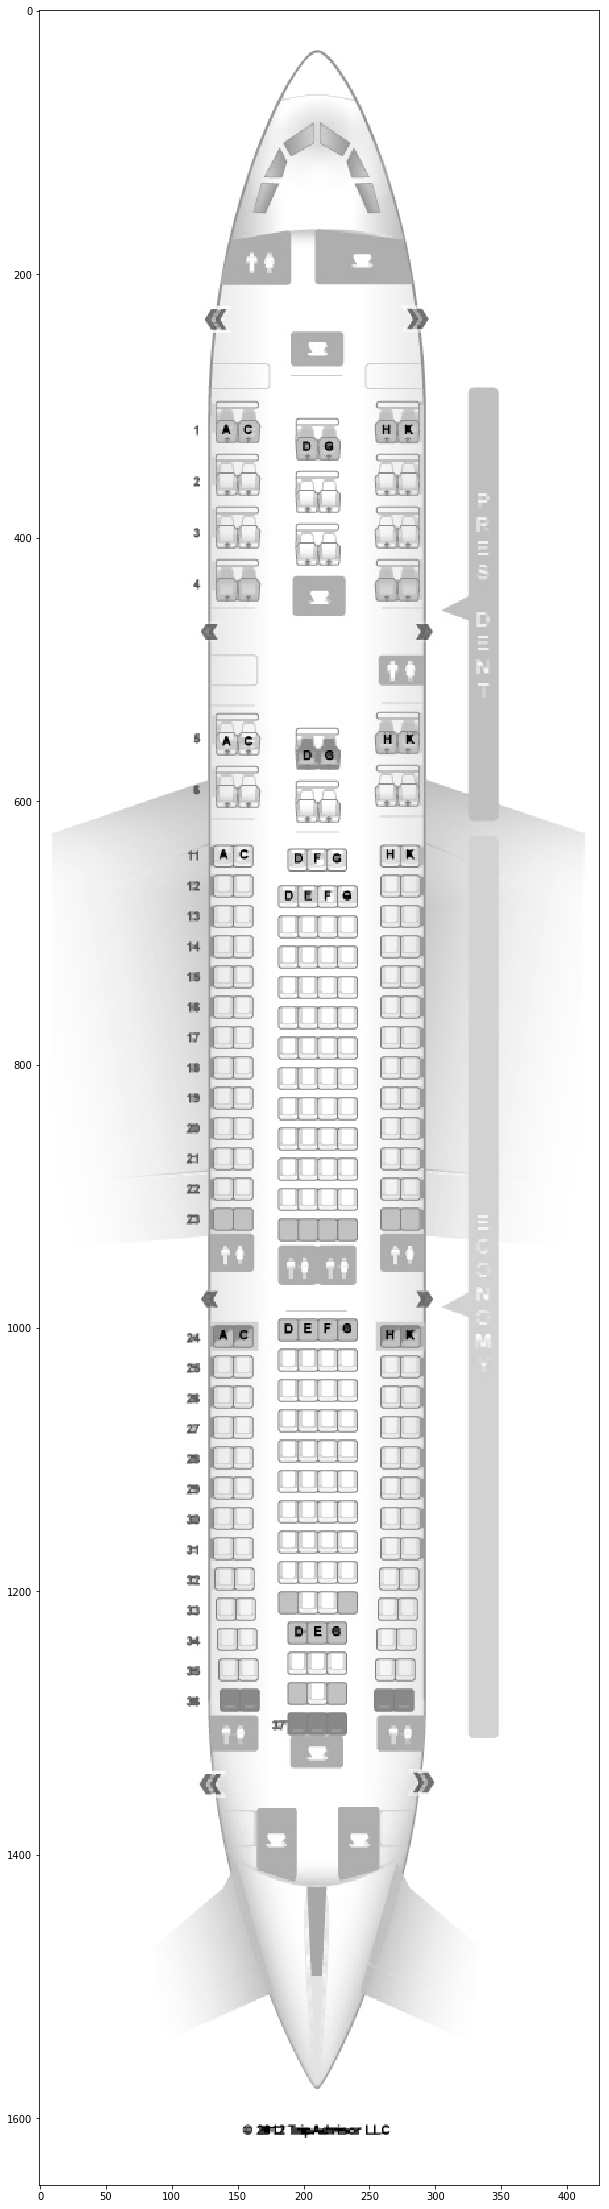

In [51]:
# Opening:
kernel = np.ones((2,3),np.uint8)
opening = cv2.morphologyEx(imgray, cv2.MORPH_OPEN, kernel)
plt.figure(figsize=(20,40))
plt.imshow(opening, cmap='gray')

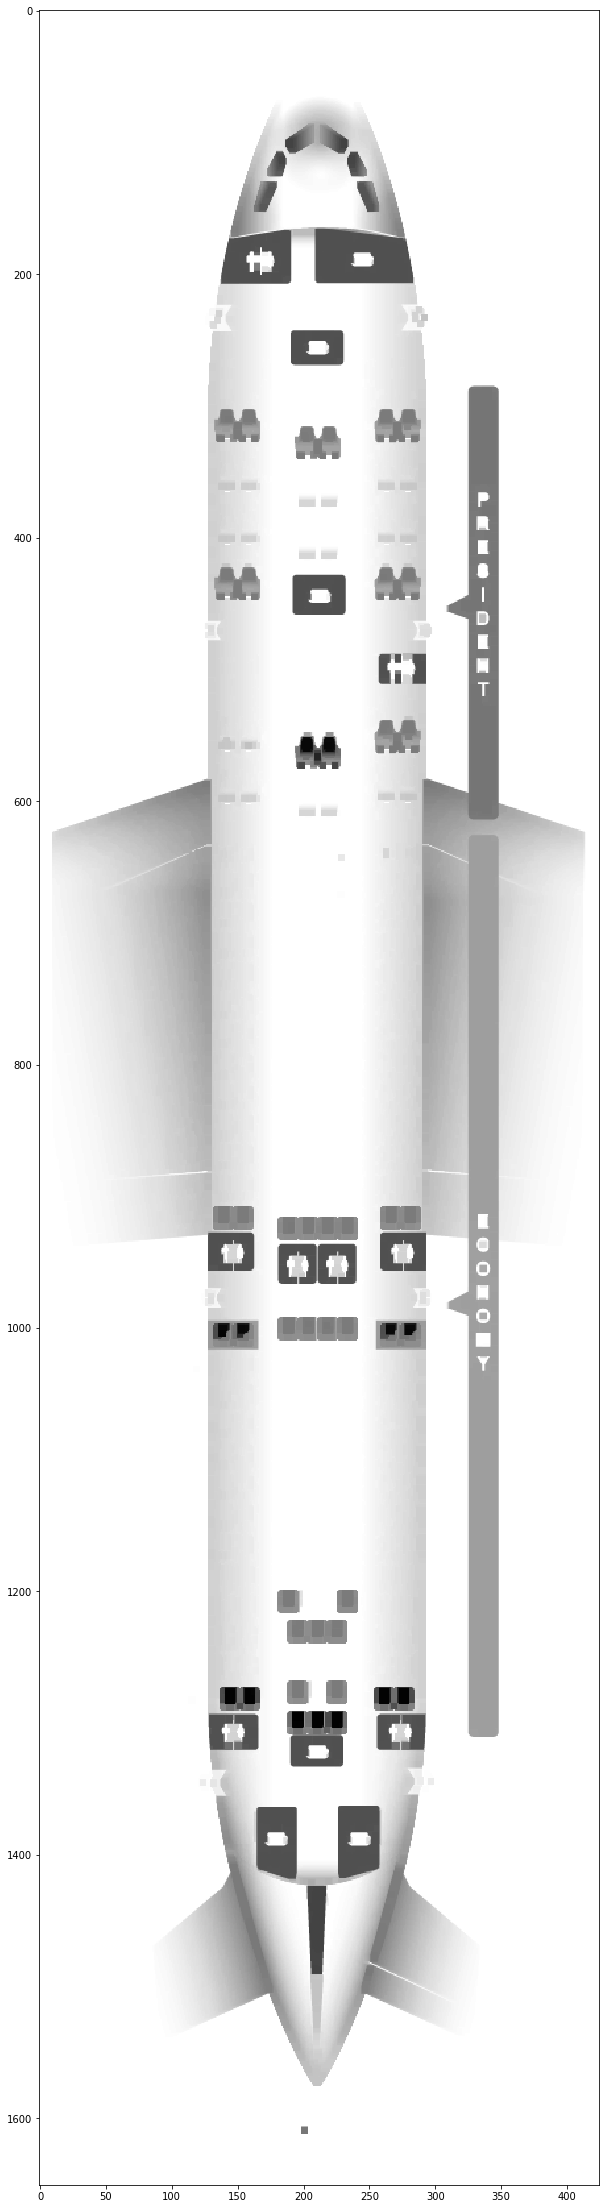

In [26]:
# Closing: toilette cafe fauteille de couleur
kernel = np.ones((5,5),np.uint8)
closing = cv2.morphologyEx(imgray, cv2.MORPH_CLOSE, kernel)
plt.figure(figsize=(20,40))
plt.imshow(closing, cmap='gray')

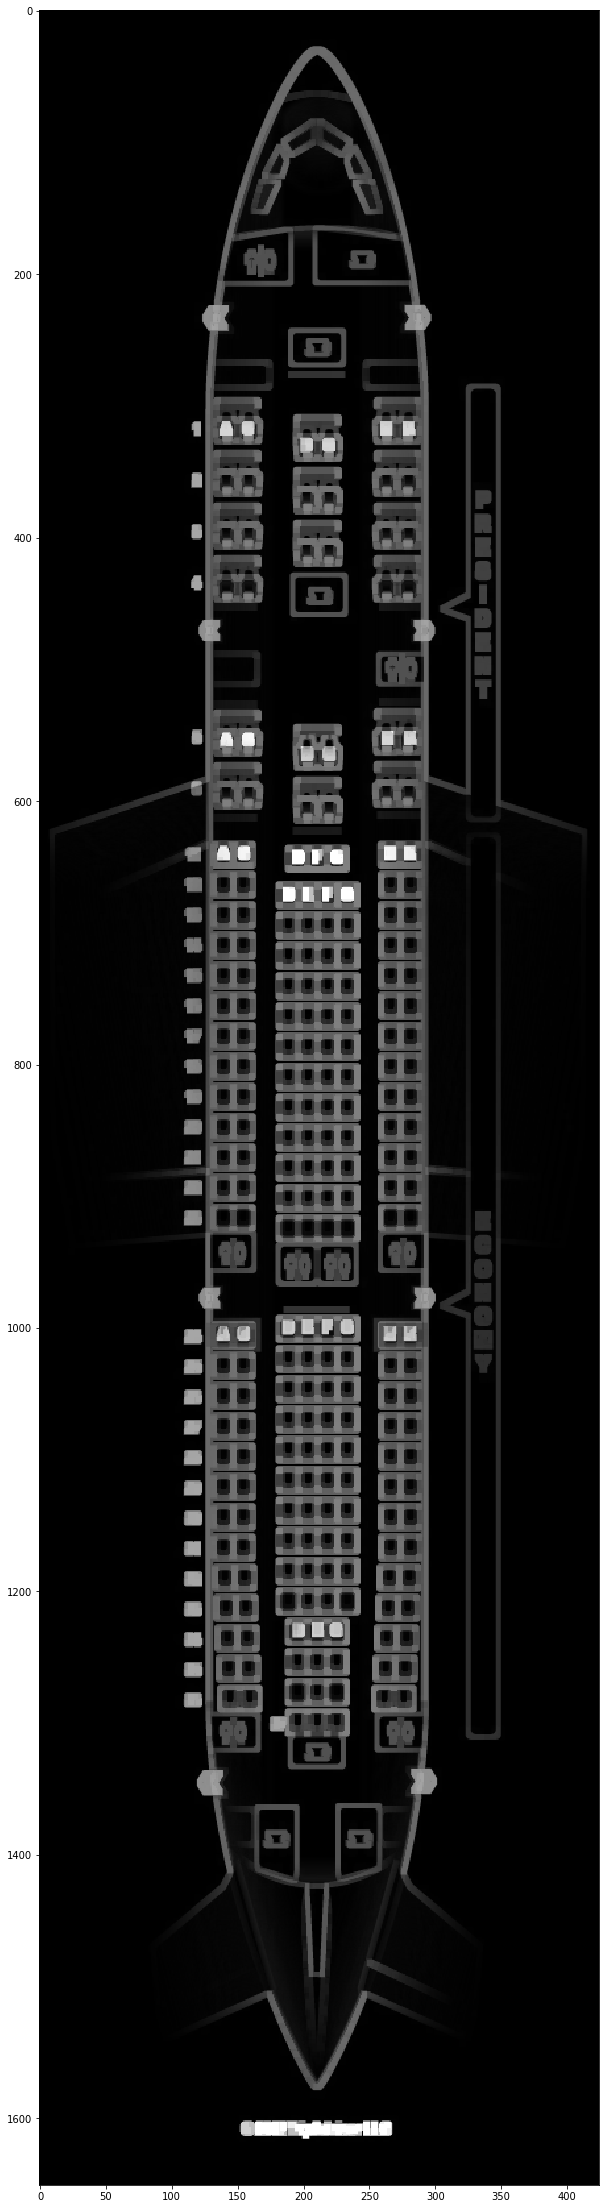

In [27]:
# Morphological gradient: toilette cafe
kernel = np.ones((5,5),np.uint8)
gradient = cv2.morphologyEx(imgray, cv2.MORPH_GRADIENT, kernel)
plt.figure(figsize=(20,40))
plt.imshow(gradient, cmap='gray')

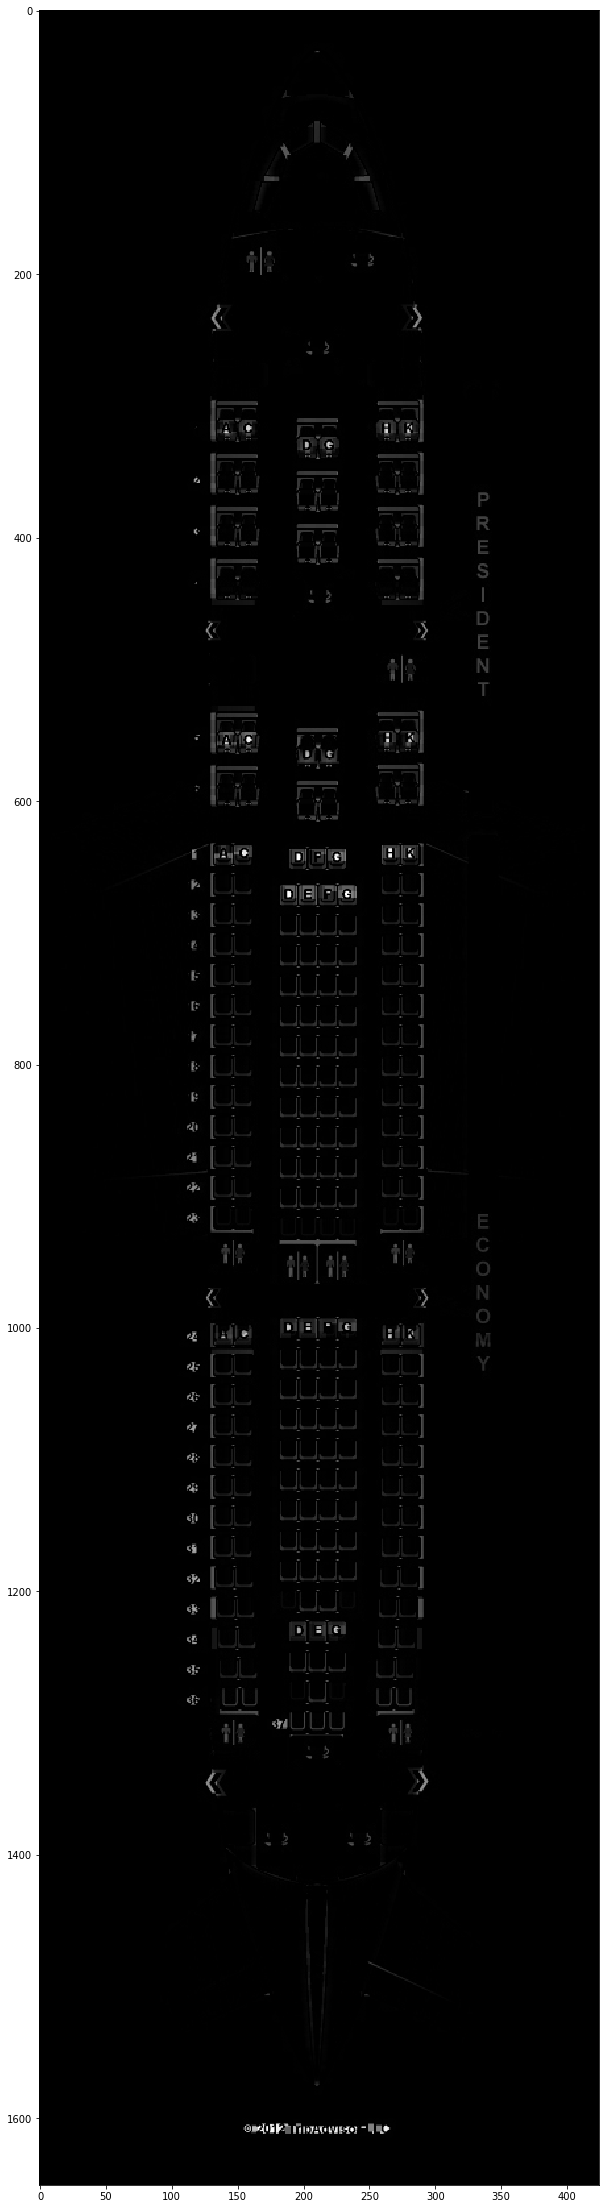

In [28]:
# Top hat: (toilettes 'exit' et lettre)
kernel = np.ones((5,5),np.uint8)
tophat = cv2.morphologyEx(imgray, cv2.MORPH_TOPHAT, kernel)
plt.figure(figsize=(20,40))
plt.imshow(tophat, cmap='gray')

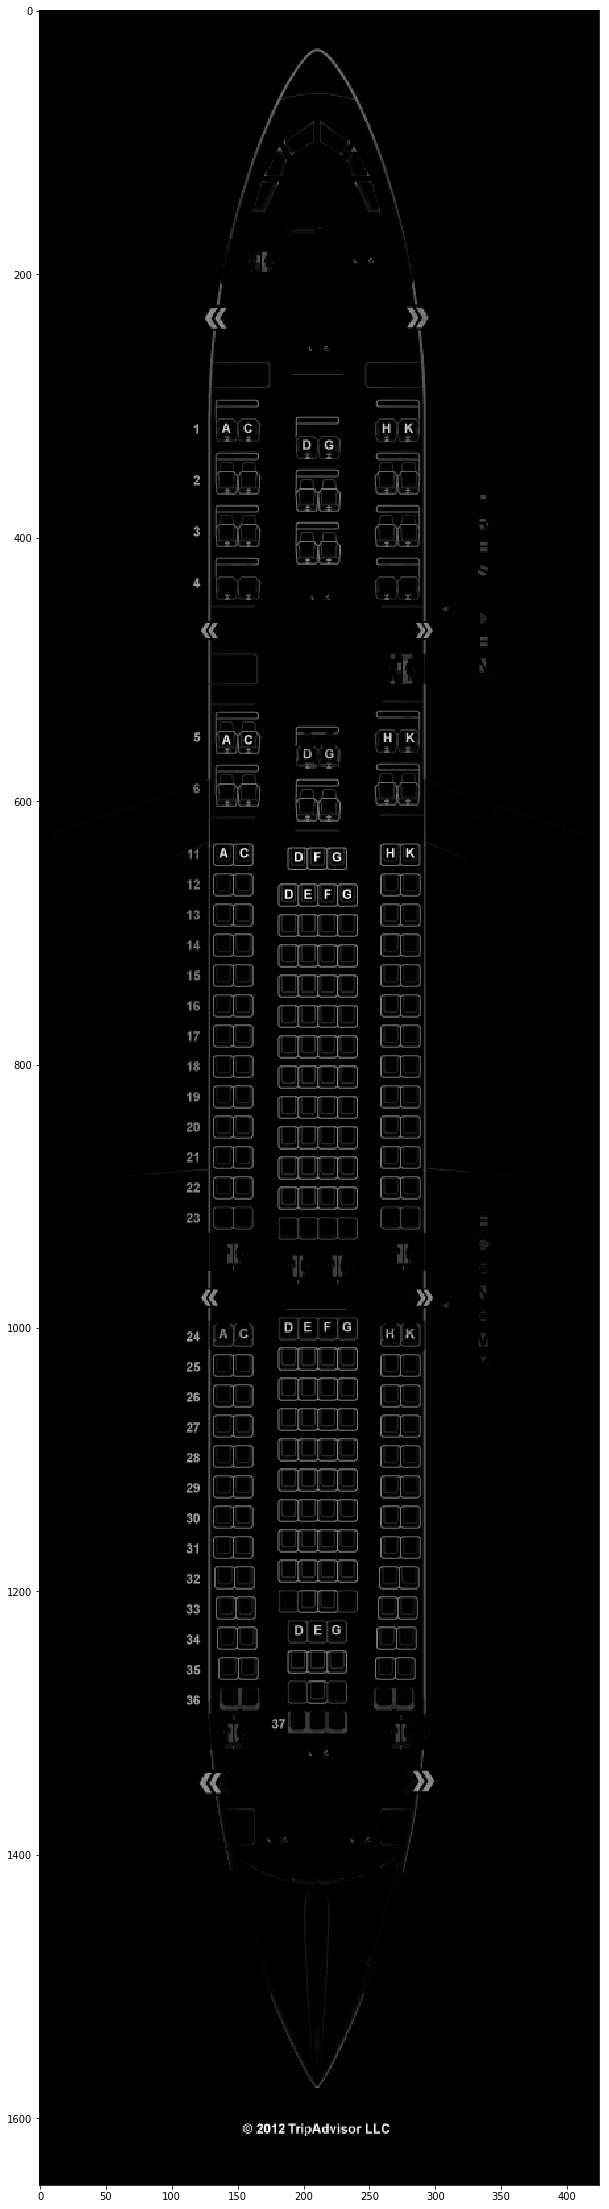

In [29]:
# Black hat: Bon pour les lettres, fauteilles et 'exit'
kernel = np.ones((5,5),np.uint8)
blackhat = cv2.morphologyEx(imgray, cv2.MORPH_BLACKHAT, kernel)
plt.figure(figsize=(20,40))
plt.imshow(blackhat, cmap='gray')

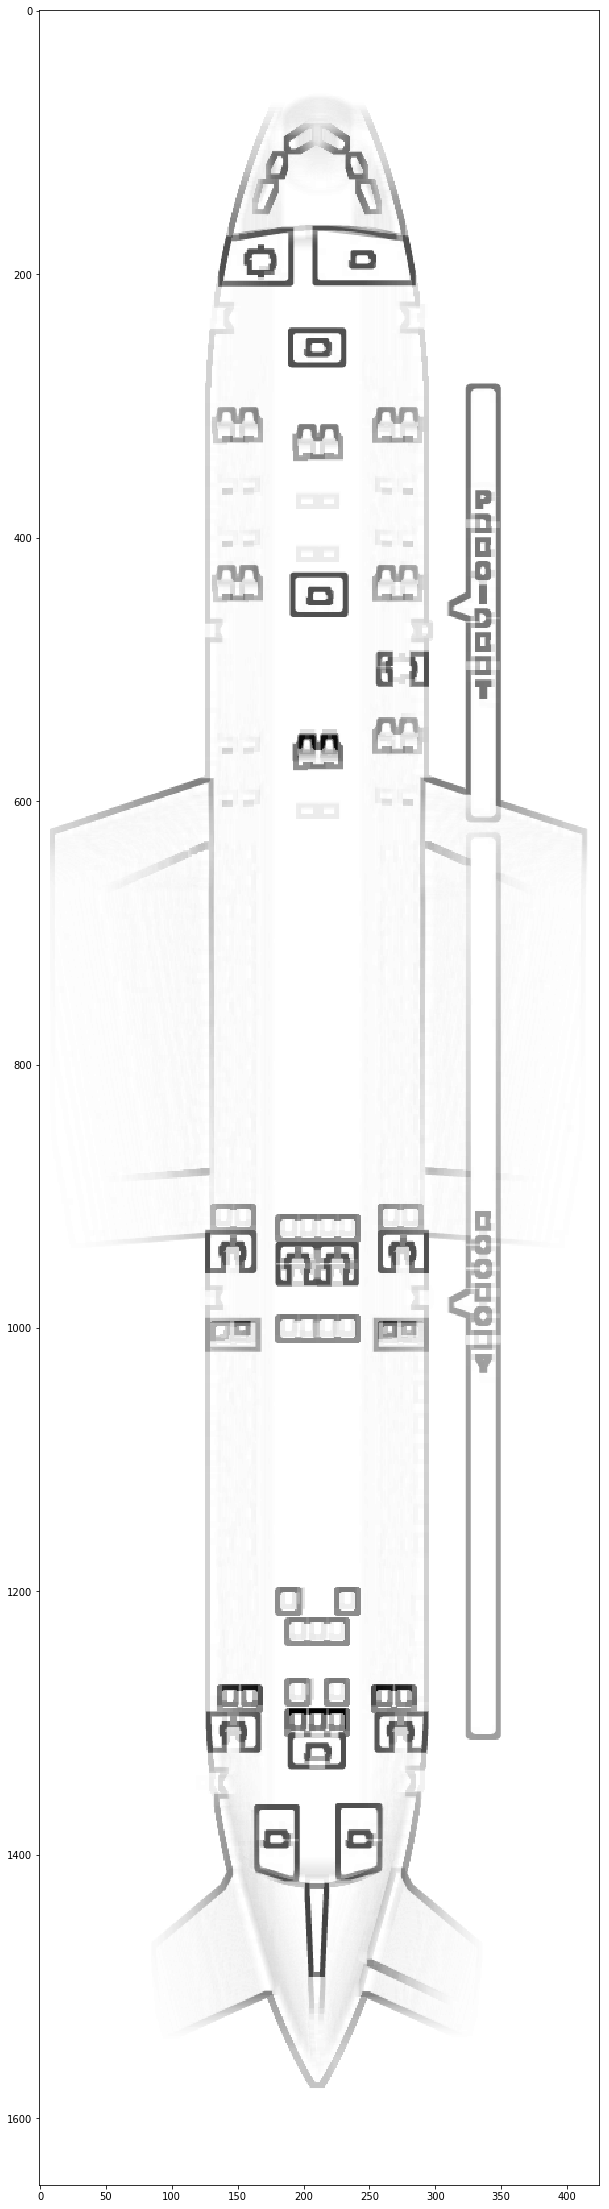

In [34]:
# Test closing + morphological gradient
kernel = np.ones((7,7),np.uint8)
closing = cv2.morphologyEx(imgray, cv2.MORPH_CLOSE, kernel)
kernel = np.ones((5,5),np.uint8)
gradient = cv2.morphologyEx(closing, cv2.MORPH_GRADIENT, kernel)
gradient = ~gradient
plt.figure(figsize=(20,40))
plt.imshow(gradient, cmap='gray')

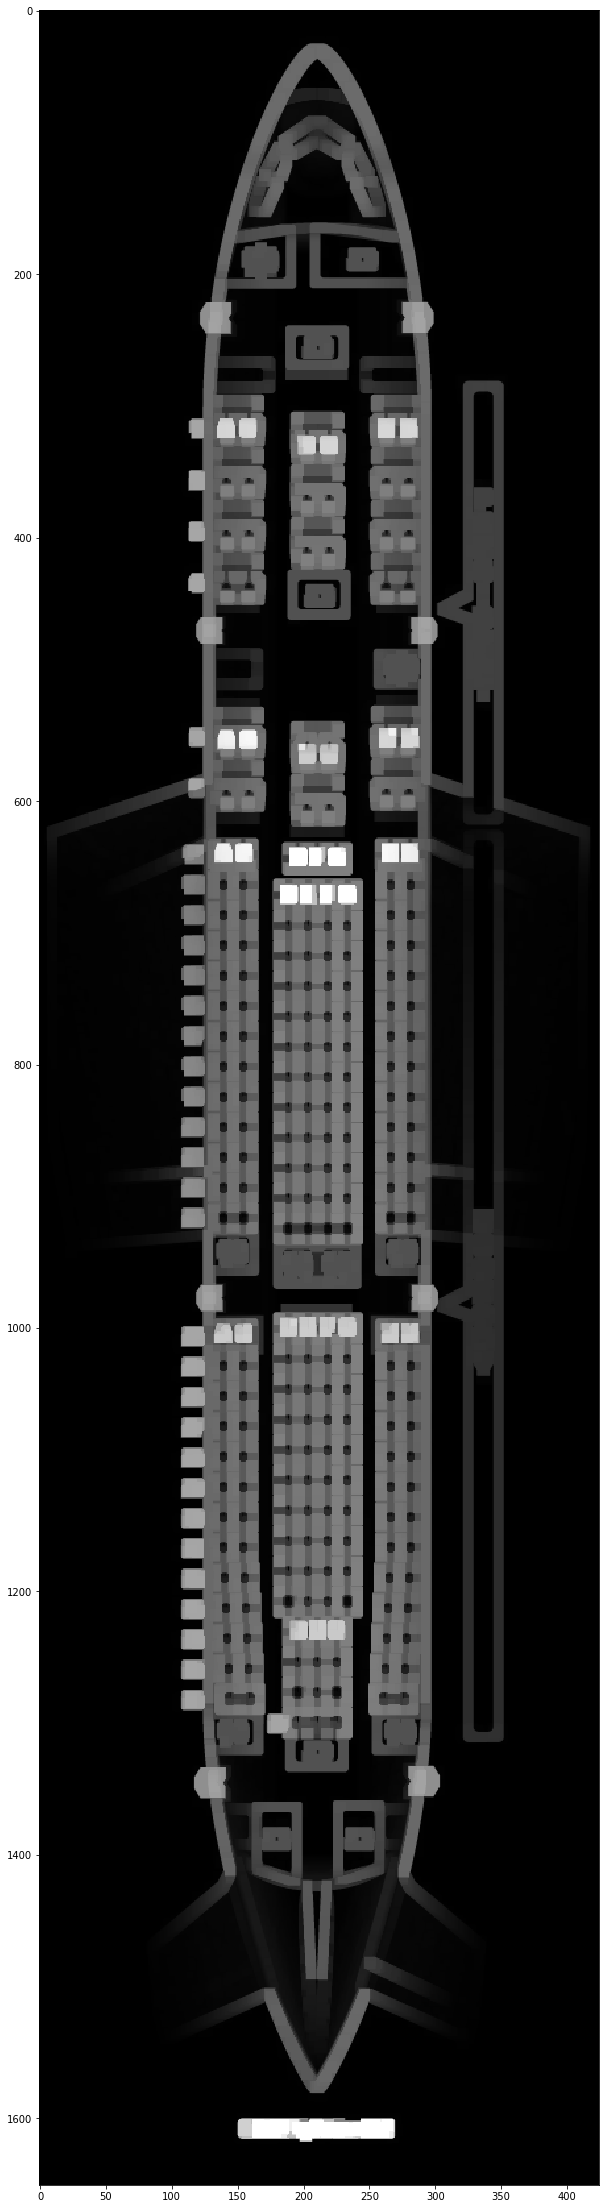

In [39]:
# Test morpho gradient + dilation
kernel = np.ones((5,5),np.uint8)
gradient = cv2.morphologyEx(imgray, cv2.MORPH_GRADIENT, kernel)
kernel = np.ones((5,5),np.uint8)
dilation = cv2.dilate(gradient,kernel,iterations = 1)
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(dilation,kernel,iterations = 1)
erosion = ~erosion
plt.figure(figsize=(20,40))
plt.imshow(dilation, cmap='gray')

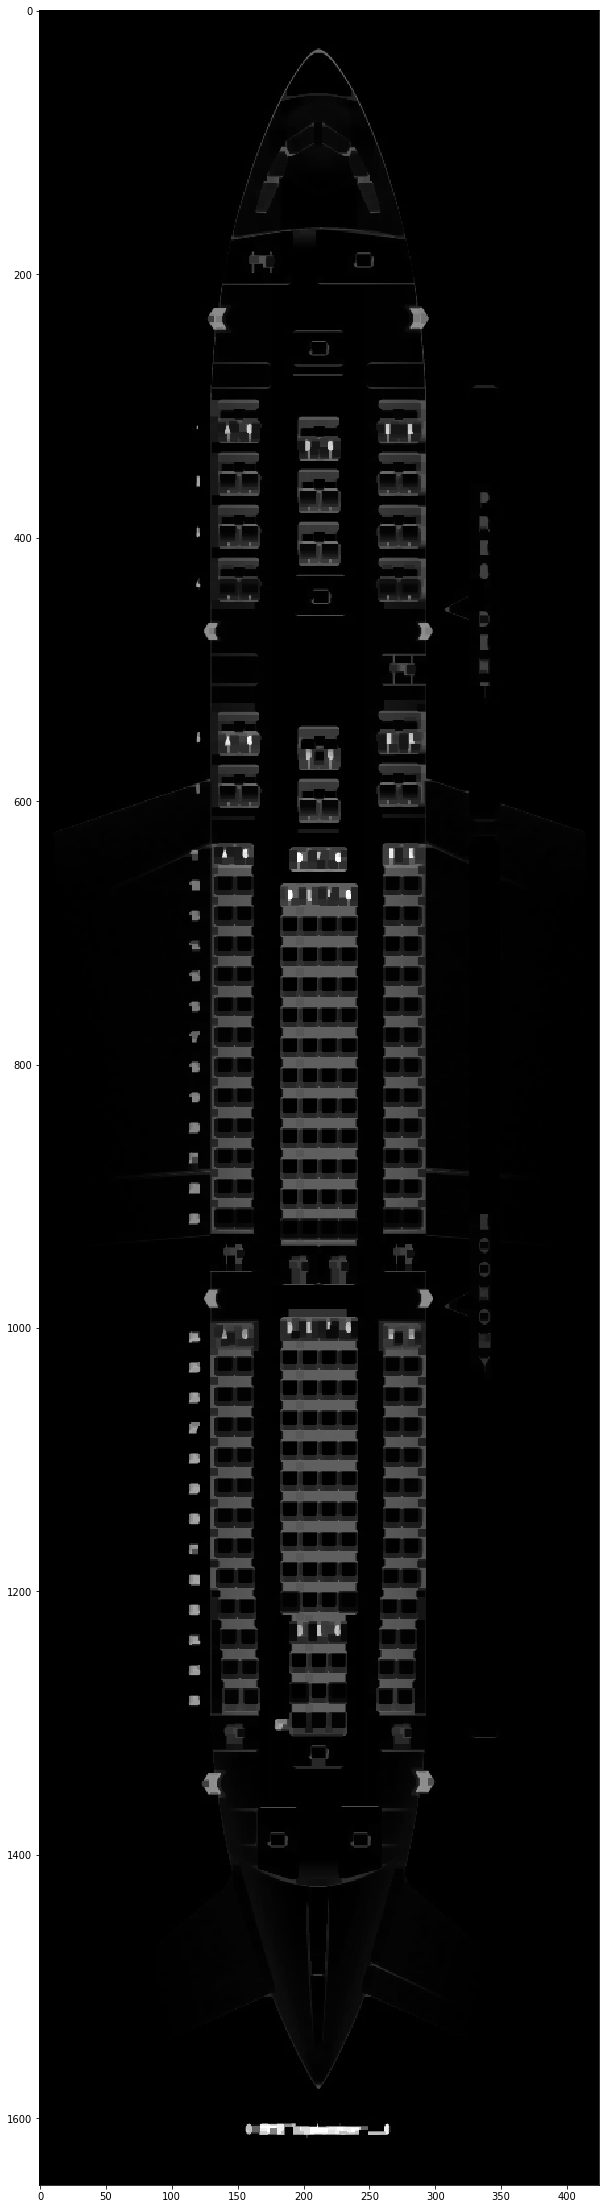

In [74]:
# morfo gradient + erosion
kernel = np.ones((6,4),np.uint8)
gradient = cv2.morphologyEx(imgray, cv2.MORPH_GRADIENT, kernel)
kernel = np.ones((5,6),np.uint8)
erosion = cv.erode(gradient,kernel,iterations = 1)
plt.figure(figsize=(20,40))
plt.imshow(erosion, cmap='gray')

# Test isolé couleur

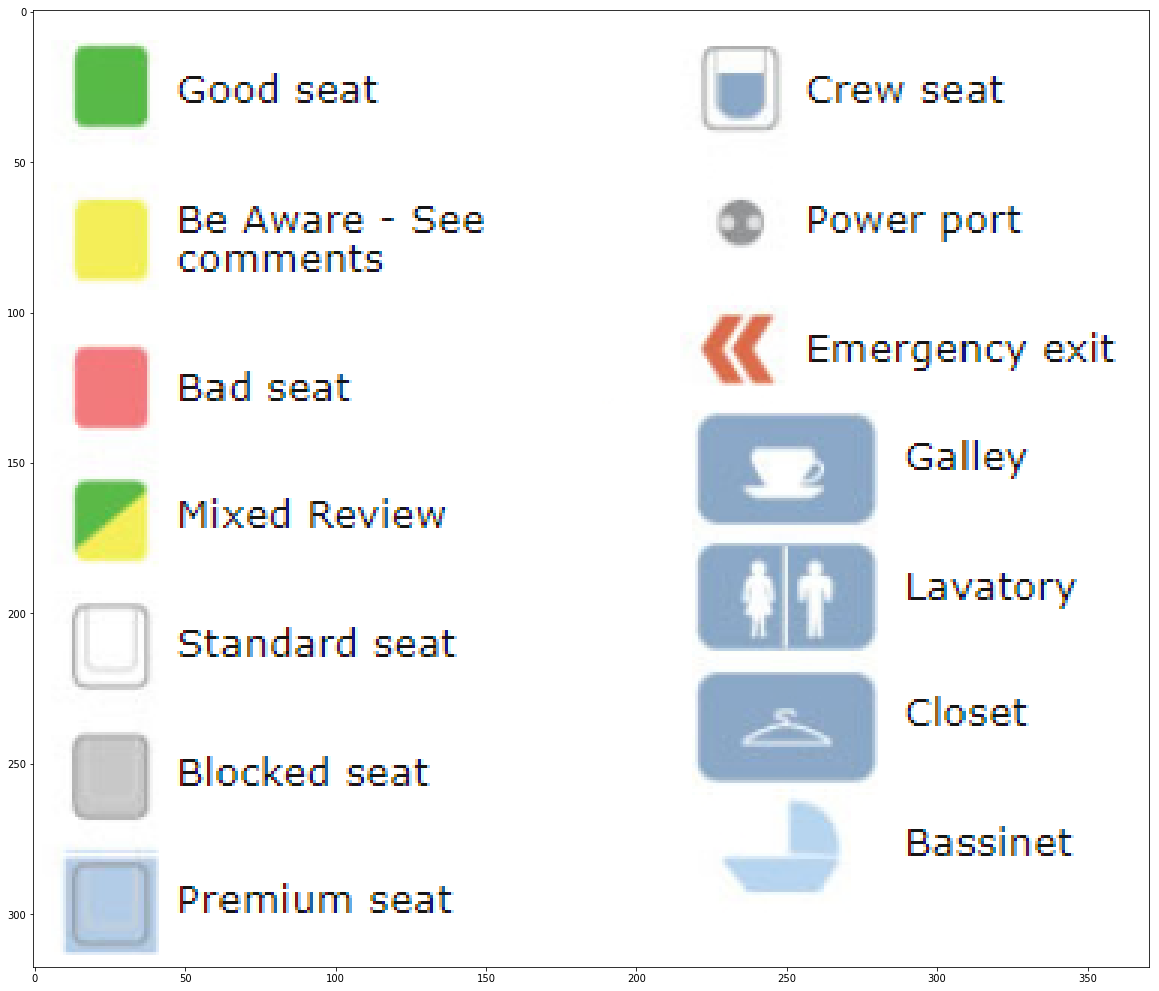

In [54]:
img = plt.imread('/home/sid2018-6/Documents/proget_interpromo/ProjetInterpromo2020G8/images/image2.png')
plt.figure(figsize=(20,20))
plt.imshow(img)

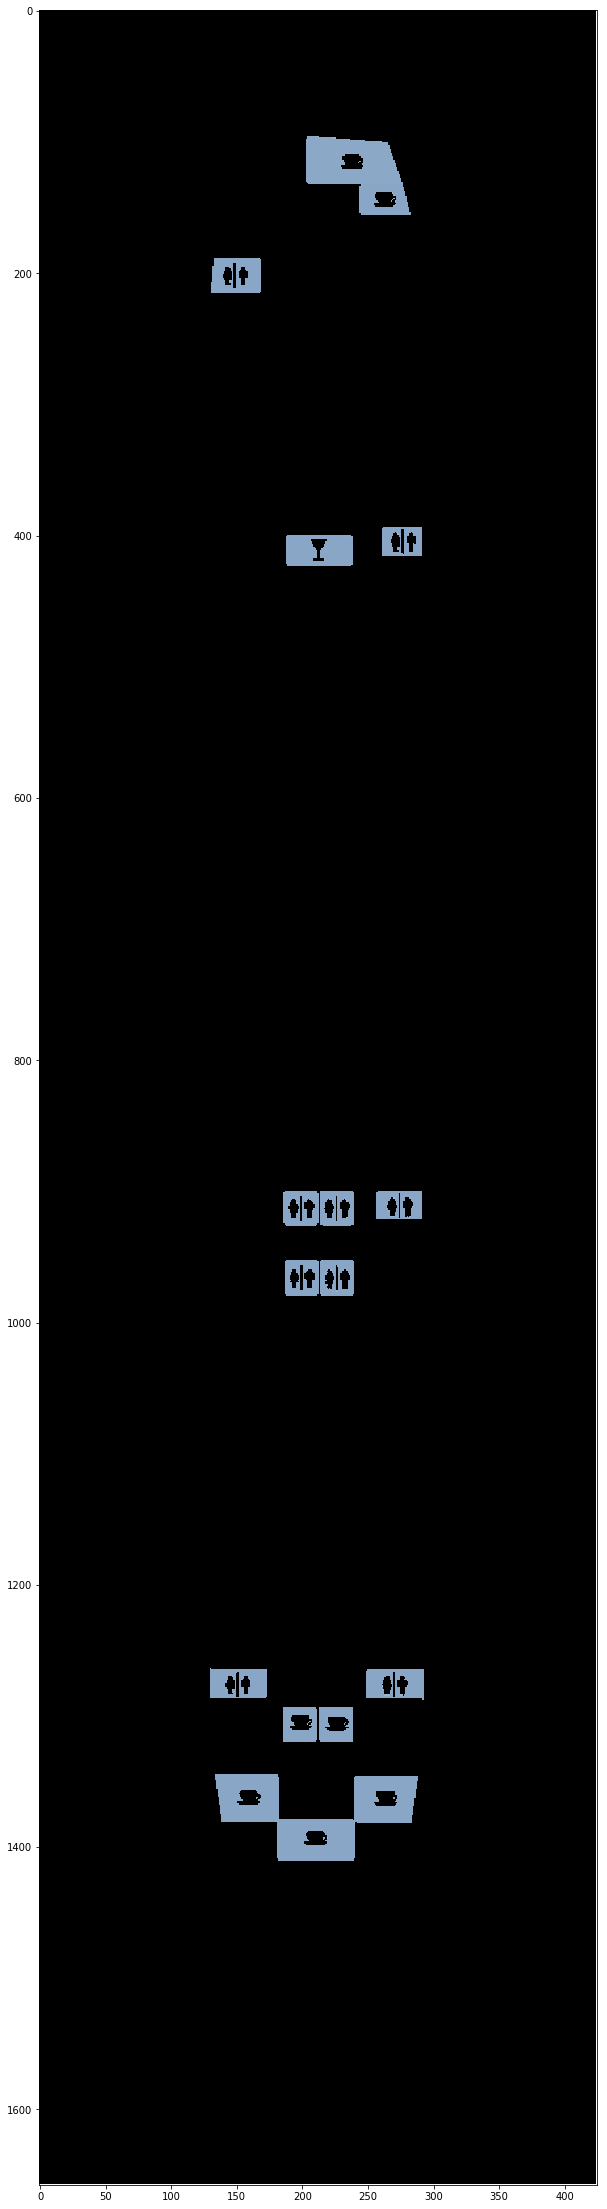

In [103]:
# img = plt.imread('/home/sid2018-6/Documents/proget_interpromo/ProjetInterpromo2020G8/images/image2.png')
img = plt.imread('/home/sid2018-6/Documents/proget_interpromo/Interpromo2020/Interpromo2020/All Data/ANALYSE IMAGE/LAYOUT SEATGURU/Alitalia_Airlines_Boeing_777-200_plane153.jpg')
img_copy = img.copy()
blue = [139, 168, 198]
yellow = [247, 237, 86]
green = [89, 185, 71]
red_bad_seat = [244, 121, 123]
red_exit = [222, 111, 100]
for i in range(img.shape[0]-1):
    for j in range(img.shape[1]-1):
        pixel = [int(val) for val in img[i][j]]
        if sum([1 if abs(p-b) < 20 else 0 for p,b in zip(pixel, bleu)]) <= 2:
            img_copy[i][j] = [0., 0., 0.]
plt.figure(figsize=(20,40))
plt.imshow(img_copy)

In [5]:
image = cv2.imread('/home/sid2018-6/Documents/proget_interpromo/ProjetInterpromo2020G8/images/image2.png')

In [ ]:
#boundaries = [
#	([17, 15, 100], [50, 56, 200]),
#	([86, 31, 4], [220, 88, 50]),
#	([25, 146, 190], [62, 174, 250]),
#	([103, 86, 65], [145, 133, 128])
#]

#for (lower, upper) in boundaries:
#    lower = np.array(lower, dtype = "uint8")
#    upper = np.array(upper, dtype = "uint8")
#    mask = cv2.inRange(image, lower, upper)
#    output = cv2.bitwise_and(image, image, mask = mask)
#    cv2.imshow("images", np.hstack([image, output]))
#    cv2.waitKey(0)